# 🌎 GPGN268 - Geophysical Data Analysis
- **Instructor:** Bia Villas Boas  
- **TA:** Seunghoo Kim

## Lecture 10: Data exploration techniques I

#### 🎯 Learning Objectives from this Lecture:

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load max temperature data into a numpy array.
# According to the README this corresponds to monthly maximum temperatures
# from 2000 to 2022 at the Dever Water Department meteorological station.
tmax = np.loadtxt(fname='../assignments/intro-python/data/meteo_denver_tmax_2000_2022.txt', delimiter='\t')

### Using imshow to visualize raw data
The first step in analyzing 2D data is to plot all the values using imshow

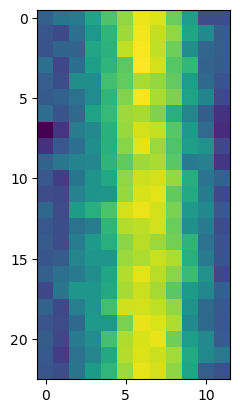

In [3]:
# imshow is good for taking a quick look at the data.
# It plots the array in its native form (origin on the top left) 
plt.imshow(tmax)

### How can we make this better?

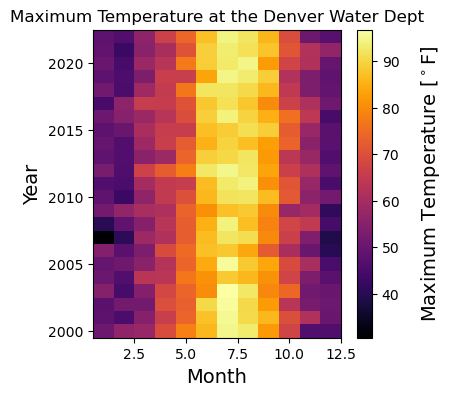

In [4]:
# Create an array for the calendar months
months = np.arange(1, 13)
# Create an array for years from 2000 to 2022
years = np.arange(2000, 2023)

# Visualize the 2D array
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
cs = ax.pcolormesh(months, years, tmax, cmap='inferno')
ax.set_ylabel('Year', fontsize=14)
ax.set_xlabel('Month', fontsize=14)
cbar = plt.colorbar(cs)
cbar.set_label('Maximum Temperature [$^\circ$F]', fontsize=14, labelpad=14)
plt.title('Maximum Temperature at the Denver Water Dept')
plt.show()

### 🧐 Be curious
- What type of data is this?
- What can you learn from this data?
- What type of questions could you you ask?

###  Data vs models
What governs surface air temperature? In an ideal and noise free world,
we could hypothesize that temperatures are controlled by seasonal changes in air-sea heat fluxes, $Q_{net}$. Thus

$$\frac{dT}{dt} = Q_{net}\hspace{3cm} (1)$$

###

If $Q_{net}$ were sinusoidal (e.g. $Q_{net} = −q \cos(\omega t)$, where $\omega = 2\pi/12$, and $t$ is in months), then we could solve for temperature:

$$T = T_o - \frac{q}{\omega}\sin(\omega t)\hspace{3cm} (2)$$

and we’d have a simple sinusoidal temperature. Real data are never so simple, and we inevitably
have a signal that combines multiple factors:
1. Physical forcing we understand (e.g. the annual cycle in this case.)
2. Physical forcing that we might have hoped to ignore (e.g. stomier years, warming/cooling trends)
3. Instrumental noise (e.g. instrumental inaccuracies.)

### What can we learn from our data?

So as an example, how can we characterize the our maximum
temperature record?  Our data has measurements every month. 
We can label each individual measurement as $T_i$ to denote the $i$th
realization of our temperature measurement.  Each $T_i$ can be referred
to as a *random variable*, and for the moment we'll assume that each
observation is independent.

If we go measure the maximum temperature at the Denver Water Department, what do we expect to see? The mean or average of the temperature measurements is:

$$\mbox{mean}(T)= \overline{T} = \langle T\rangle = \frac{1}{N} \sum_{i=1}^N T_i \hspace{3cm} (3)$$

This is the mean of my $N$ measurements.

Knowing the mean temperature is great, but assuming that the temperature
we measured today doesn't match the mean, how can we tell if the deviation
from the mean is typical?     As a first measure, we can compute the
variance:

$$\mbox{var}(T)= \sigma^2_{T} = \frac{1}{N-1} \sum_{i=1}^N (T_i-\overline{T})^2,  \hspace{3cm} (8)$$

and the standard deviation, which is the square-root of the variance:
$$\mbox{std}(T)= \sigma_{T} =  \sqrt{\frac{1}{N-1} \sum_{i=1}^N (T_i-E(T))^2}.  \hspace{3cm} (9)$$

The mean and standard deviation give us quite a bit of information, but
they don't tell us everything.  What if temperature in our dataset were generated by a coin toss, with only two values (e.g. 50.1$^\circ$F or 67.2$^\circ$F)?  That
would give us a bimodal distribution?  With a hundred realizations,
we could make a histogram of temperatures that would look like this

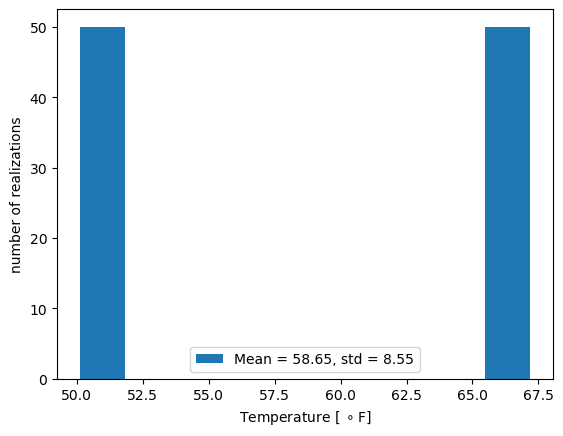

In [5]:
fake_temp = np.ones(100)
fake_temp[:50] = fake_temp[:50]*50.1
fake_temp[50:] = fake_temp[50:]*67.2
mean_fake = fake_temp.mean()
std_fake = fake_temp.std()
plt.hist(fake_temp, label='Mean = {}, std = {}'.format(mean_fake, std_fake))
plt.xlabel('Temperature [$^ \circ$F]')
plt.ylabel('number of realizations')
plt.legend()
plt.show()

### What is the issue there?
- What is the mean of the observations?
- How often is the mean observed?

### Probability density functions
Histograms are useful, but they're hard to compare for different numbers
of data points. To allow comparison, we may normalize as a probability
density function so that the area under the curve tells us the probability
of finding an observed value within a given range.  Formally,
for a probability density function $p(x)$,

$$\begin{equation}
\int_a^b p(x) \, dx = \mbox{Prob}[a < x \le b],  \hspace{3cm} (14)
\end{equation}$$

and the total area under the curve for $p(x)$ is fixed

$$\begin{equation}
\int_{-\infty}^\infty p(x) \, dx = \mbox{Prob}[-\infty < x \le \infty] = 1.  \hspace{3cm} (15)
\end{equation}$$

If we use we show our hypothetical bimodal data as a pdf, it would look like:

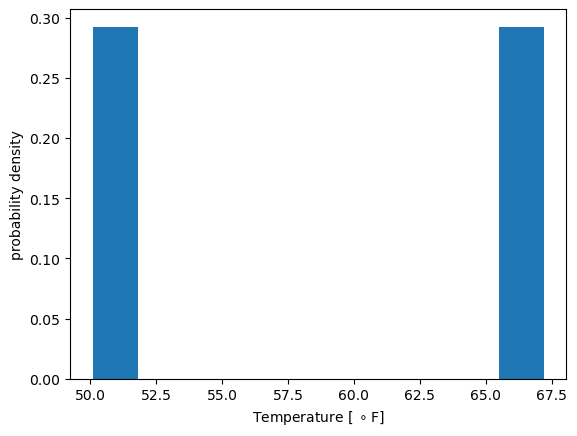

In [6]:
plt.hist(fake_temp, density=True)
plt.xlabel('Temperature [$^ \circ$F]')
plt.ylabel('probability density')
plt.show()

On the other hand, we might find the temperatures are distributed uniformly around the mean. (In Python, the function `rand` from the `numpy.random` module will generate a uniform distribution, which looks like a top hat.)  A uniform distribution could have exactly the same mean and standard deviation as our bimodal distribution, so we wouldn't be able to tell them apart just by computing the mean and standard deviation.

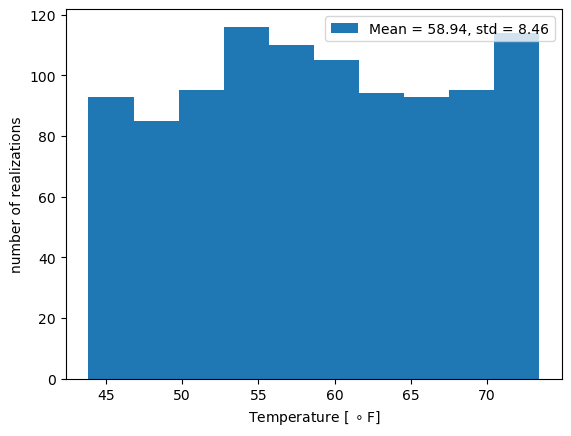

In [7]:
temp_uni = mean_fake-(12**.5)/2*std_fake + 12**.5*std_fake*np.random.rand(1000)
mean_uni, std_uni = temp_uni.mean(), temp_uni.std()
plt.hist(temp_uni, label='Mean = {:0.2f}, std = {:0.2f}'.format(mean_uni, std_uni))
plt.xlabel('Temperature [$^ \circ$F]')
plt.ylabel('number of realizations')
plt.legend()
plt.show()

More classically, we often hypothesize that data have a Gaussian distribution,
the classic bell-shaped curve, which can be represented as:

$$\begin{equation}
p(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
\end{equation}$$

where $\mu$ is the mean and $\sigma$ is the standard deviation.
Again, we can define the Gaussian distribution to have the same mean
and standard deviation as the bimodal distribution. 

🛠️ Clearly we'll need some stronger tools to interpret our data.

# Visualizing distributions

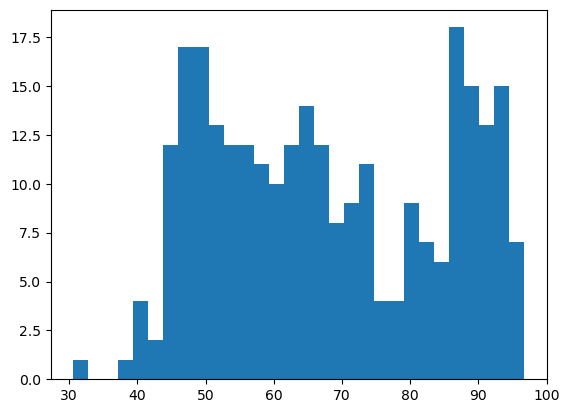

In [8]:
histogram = plt.hist(tmax.flatten(), bins=30)
plt.show()

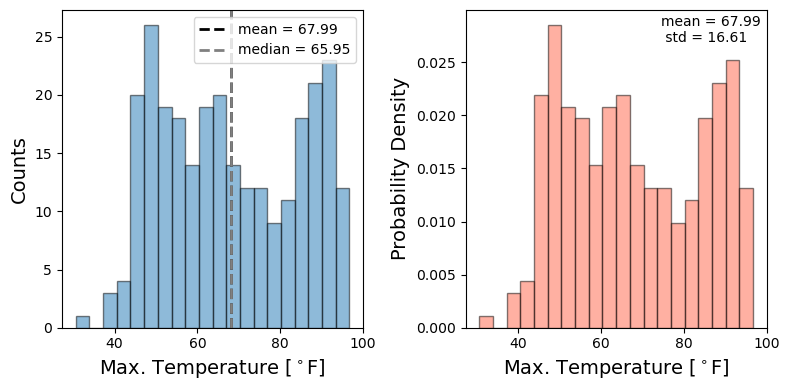

In [9]:
tmax_mean = np.mean(tmax)
tmax_median = np.median(tmax)
tmax_std = np.std(tmax)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.hist(tmax.flatten(), bins=20, alpha=0.5, histtype='bar', ec='black')
ax1.axvline(x=tmax_mean, ls='--', lw=2, color='k',
            label='mean = {:.2f}'.format(tmax_mean))
ax1.axvline(x=tmax_mean, ls='--', lw=2, color='0.5',
            label='median = {:.2f}'.format(tmax_median))
ax1.legend()
ax1.set_ylabel('Counts', fontsize=14)
ax1.set_xlabel('Max. Temperature [$^\circ$F]', fontsize=14)
ax2.hist(tmax.flatten(), bins=20, density=True, alpha=0.5,
         histtype='bar', color='tomato', ec='black')
ax2.annotate('mean = {:.2f} \n std = {:.2f}'.format(tmax_mean, tmax_std),
             xy=(0.65, 0.9), xycoords='axes fraction', fontsize=10)
ax2.set_ylabel('Probability Density', fontsize=14)
ax2.set_xlabel('Max. Temperature [$^\circ$F]', fontsize=14)
plt.tight_layout()
plt.show()

### Monthly averages

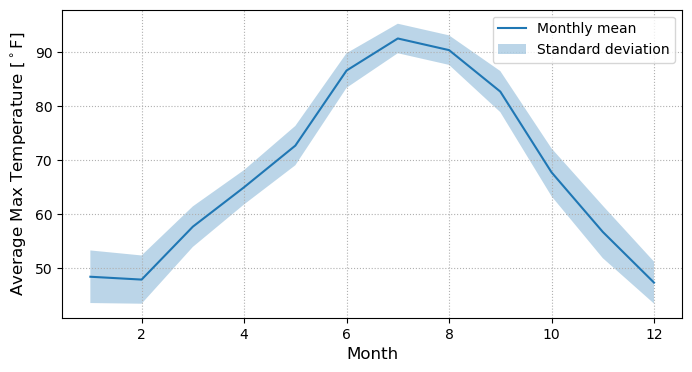

In [10]:
tmax_average = np.average(tmax, axis=0)
tmax_std = np.std(tmax, axis=0)
tmax_upper = tmax_average + tmax_std
tmax_lower = tmax_average - tmax_std


fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(months, tmax_average, label='Monthly mean')
ax.fill_between(months, tmax_lower, tmax_upper, alpha=0.3,
                label='Standard deviation')
ax.legend()
ax.set_ylabel('Average Max Temperature [$^\circ$F]', fontsize=12)
ax.set_xlabel('Month', fontsize=12)
ax.grid(ls='dotted')
plt.show()

# 💭 What story do you wanna tell?

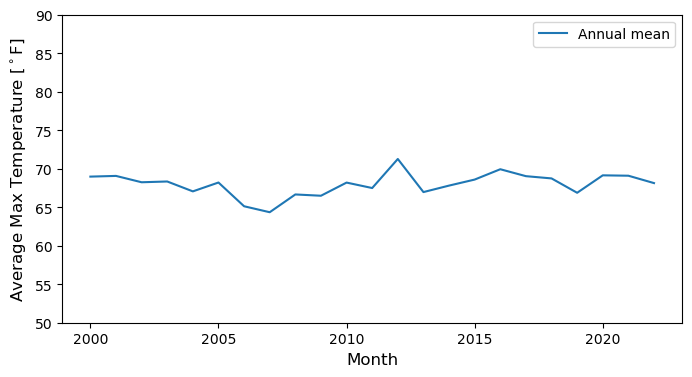

In [11]:
tmax_yearly = np.average(tmax, axis=1)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(years, tmax_yearly, label='Annual mean')
ax.legend()
ax.set_ylabel('Average Max Temperature [$^\circ$F]', fontsize=12)
ax.set_xlabel('Month', fontsize=12)
plt.ylim([50, 90])
plt.show()

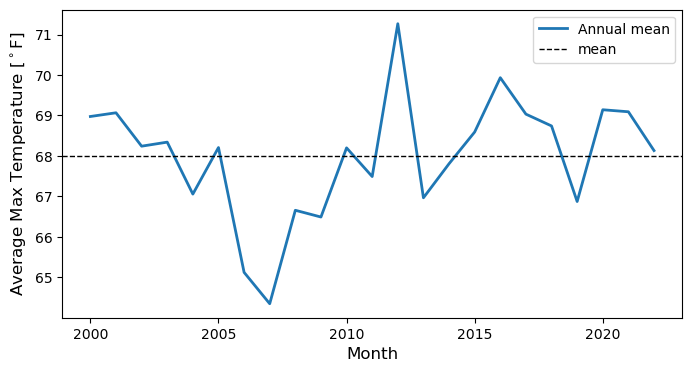

In [12]:
tmax_yearly = np.average(tmax, axis=1)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(years, tmax_yearly, lw=2, label='Annual mean')
ax.set_ylabel('Average Max Temperature [$^\circ$F]', fontsize=12)
ax.set_xlabel('Month', fontsize=12)
ax.axhline(y=np.mean(tmax_yearly), ls='--', lw=1, color='k', label='mean')
ax.legend()
plt.show()

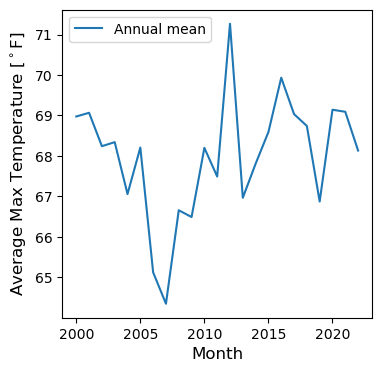

In [13]:
tmax_yearly = np.average(tmax, axis=1)

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(years, tmax_yearly, label='Annual mean')
ax.legend()
ax.set_ylabel('Average Max Temperature [$^\circ$F]', fontsize=12)
ax.set_xlabel('Month', fontsize=12)
plt.show()